#### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Reading the Data

In [2]:
Churn_Train = pd.read_excel("D:\PRAXIS\Datasets\Churn.xlsx", sheet_name = "Train")
Churn_Test = pd.read_excel("D:\PRAXIS\Datasets\Churn.xlsx", sheet_name = "Test")

In [3]:
Churn_Train.head()

,Account_Length,VMail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Int'l_Plan,VMail_Plan,...,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone,random
0,87,21,214.0,180.0,134.5,10.6,0,0,0,1,...,114,15.30,82,6.05,5,2.86,SD,415,370-2957,1
1,63,0,132.9,67.0,160.4,9.9,3,0,0,0,...,62,5.70,121,7.22,2,2.67,WV,510,329-7102,2
2,103,34,138.8,142.0,183.8,11.8,1,0,0,1,...,108,12.07,77,8.27,7,3.19,DE,415,346-5053,3
3,44,0,202.6,163.0,268.1,8.3,0,0,0,0,...,96,13.86,151,12.06,3,2.24,UT,415,387-2014,3
4,166,0,274.3,52.9,246.1,10.9,0,0,0,0,...,109,4.50,119,11.07,5,2.94,WA,408,354-9492,4


In [4]:
Churn_Train.shape

(2300, 22)

#### 3. EDA

In [5]:
# combine test and train into one dataset

nw = pd.concat([Churn_Train, Churn_Test])
nw.head()

,Account_Length,VMail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Int'l_Plan,VMail_Plan,...,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone,random
0,87,21,214.0,180.0,134.5,10.6,0,0,0,1,...,114,15.30,82,6.05,5,2.86,SD,415,370-2957,1
1,63,0,132.9,67.0,160.4,9.9,3,0,0,0,...,62,5.70,121,7.22,2,2.67,WV,510,329-7102,2
2,103,34,138.8,142.0,183.8,11.8,1,0,0,1,...,108,12.07,77,8.27,7,3.19,DE,415,346-5053,3
3,44,0,202.6,163.0,268.1,8.3,0,0,0,0,...,96,13.86,151,12.06,3,2.24,UT,415,387-2014,3
4,166,0,274.3,52.9,246.1,10.9,0,0,0,0,...,109,4.50,119,11.07,5,2.94,WA,408,354-9492,4


In [6]:
# Count of Majority & Minority class values

t = Churn_Train.Churn.value_counts()
t

0    1997
1     303
Name: Churn, dtype: int64

In [7]:
# Percentage of Minority observations

t[1]/(t[0]+t[1])*100

13.173913043478262

In [8]:
Churn_Train.groupby(["Churn"]).mean()

,Account_Length,VMail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Int'l_Plan,VMail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code,random
Churn,,,,,,,,,,,,,,,,,,,
0,100.799700,8.557837,175.805358,199.096194,200.813020,10.155684,1.444166,0.067101,0.291938,100.142714,29.887411,99.902354,16.923435,100.211818,9.036675,4.594892,2.742539,437.887331,1143.344016
1,103.339934,5.524752,205.600330,209.481188,206.140594,10.744884,2.399340,0.257426,0.178218,101.042904,34.952475,100.372937,17.805908,99.366337,9.276535,4.174917,2.901617,435.412541,1153.287129


In [9]:
len(Churn_Train["Account_Length"].unique())

206

In [10]:
corr = nw.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,Account_Length,VMail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Int'l_Plan,VMail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code,random
Account_Length,1,-0.00462782,0.00621602,-0.00675714,-0.00895519,0.0095139,-0.00379594,0.0165407,0.0247347,0.00291841,0.0384699,0.00621413,0.01926,-0.0067453,-0.0131763,-0.00895953,0.0206614,0.00954567,-0.0124635,-0.0143678
VMail_Message,-0.00462782,1,0.000778274,0.017562,0.00768114,0.0028562,-0.0132626,-0.089728,0.00874549,0.956927,-0.00954807,0.000775523,-0.00586435,0.0175778,0.00712306,0.00766329,0.0139573,0.00288366,-0.00199437,-0.0116325
Day_Mins,0.00621602,0.000778274,1,0.00704251,0.00432337,-0.0101546,-0.0134232,0.205151,0.0493958,-0.00168407,0.00675041,1,0.015769,0.00702904,0.0229725,0.00430036,0.00803336,-0.010092,-0.00826437,0.0170492
Eve_Mins,-0.00675714,0.017562,0.00704251,1,-0.0125837,-0.0110347,-0.0129846,0.0927958,0.0191,0.021545,-0.0214514,0.00704961,-0.0114301,1,0.00758564,-0.0125928,0.00254129,-0.0110666,0.00358039,-0.00373031
Night_Mins,-0.00895519,0.00768114,0.00432337,-0.0125837,1,-0.0152073,-0.00928761,0.0354929,-0.0289048,0.00607866,0.0229378,0.00432388,-0.00209277,-0.012592,0.0112039,0.999999,-0.0123534,-0.0151798,-0.00582466,-0.0108962
Intl_Mins,0.0095139,0.0028562,-0.0101546,-0.0110347,-0.0152073,1,-0.00963968,0.0682388,0.0458707,-0.00131787,0.0215648,-0.0101569,0.00870288,-0.0110426,-0.013605,-0.0152135,0.0323039,0.999993,-0.0182882,-0.00678674
CustServ_Calls,-0.00379594,-0.0132626,-0.0134232,-0.0129846,-0.00928761,-0.00963968,1,0.20875,-0.024522,-0.0178239,-0.0189419,-0.013427,0.00242257,-0.0129874,-0.0128019,-0.00927695,-0.0175606,-0.00967473,0.0275722,0.0112338
Churn,0.0165407,-0.089728,0.205151,0.0927958,0.0354929,0.0682388,0.20875,1,0.259852,-0.102148,0.0184593,0.205151,0.00923313,0.092786,0.0061412,0.0354956,-0.0528443,0.0682586,0.00617423,0.048115
Int'l_Plan,0.0247347,0.00874549,0.0493958,0.0191,-0.0289048,0.0458707,-0.024522,0.259852,1,0.00600637,0.00375463,0.0493981,0.00611358,0.0191062,0.0124512,-0.0289128,0.0173663,0.0457801,0.0485505,0.0372646
VMail_Plan,0.00291841,0.956927,-0.00168407,0.021545,0.00607866,-0.00131787,-0.0178239,-0.102148,0.00600637,1,-0.0110859,-0.00168563,-0.00644444,0.0215585,0.0155525,0.00606371,0.00761759,-0.00127627,-0.000747095,-0.0028967


#### 4. Feature Engineering

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# LabelEncoder: encodes categorical features using a one-hot or ordinal encoding scheme.
# OneHotEncoder: creates a binary column for each category and returns a sparse matrix or dense array.

new_le = LabelEncoder()
nw["State_le"] = new_le.fit_transform(nw.State)

new_le = LabelEncoder()
nw["AreaCode_le"] = new_le.fit_transform(nw.Area_Code)

nw = nw.drop(["State", "Area_Code"], axis = 1)

nw.head()

,Account_Length,VMail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Int'l_Plan,VMail_Plan,...,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Phone,random,State_le,AreaCode_le
0,87,21,214.0,180.0,134.5,10.6,0,0,0,1,...,114,15.30,82,6.05,5,2.86,370-2957,1,41,1
1,63,0,132.9,67.0,160.4,9.9,3,0,0,0,...,62,5.70,121,7.22,2,2.67,329-7102,2,49,2
2,103,34,138.8,142.0,183.8,11.8,1,0,0,1,...,108,12.07,77,8.27,7,3.19,346-5053,3,8,1
3,44,0,202.6,163.0,268.1,8.3,0,0,0,0,...,96,13.86,151,12.06,3,2.24,387-2014,3,44,1
4,166,0,274.3,52.9,246.1,10.9,0,0,0,0,...,109,4.50,119,11.07,5,2.94,354-9492,4,47,0


In [12]:
nw["Local_Charges"] = nw.Day_Charge + nw.Eve_Charge + nw.Night_Charge

In [13]:
# Percentage of different charges, on Local_Charges

nw["pDay"] = 100 * nw.Day_Charge/nw.Local_Charges
nw["pNight"] = 100 * nw.Night_Charge/nw.Local_Charges
nw["pEve"] = 100 * nw.Eve_Charge/nw.Local_Charges

In [14]:
nw["Total_Charges"] = nw.Local_Charges + nw.Intl_Charge
nw["pIntnl"] = 100 * nw.Intl_Charge/nw.Total_Charges

nw = nw.drop(["Total_Charges"], axis = 1)

nw.head()

,Account_Length,VMail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Int'l_Plan,VMail_Plan,...,Intl_Charge,Phone,random,State_le,AreaCode_le,Local_Charges,pDay,pNight,pEve,pIntnl
0,87,21,214.0,180.0,134.5,10.6,0,0,0,1,...,2.86,370-2957,1,41,1,57.73,63.017495,10.479820,26.502685,4.720251
1,63,0,132.9,67.0,160.4,9.9,3,0,0,0,...,2.67,329-7102,2,49,2,35.51,63.615883,20.332301,16.051816,6.993190
2,103,34,138.8,142.0,183.8,11.8,1,0,0,1,...,3.19,346-5053,3,8,1,43.94,53.709604,18.821120,27.469276,6.768513
3,44,0,202.6,163.0,268.1,8.3,0,0,0,0,...,2.24,387-2014,3,44,1,60.36,57.057654,19.980119,22.962227,3.578275
4,166,0,274.3,52.9,246.1,10.9,0,0,0,0,...,2.94,354-9492,4,47,0,62.20,74.967846,17.797428,7.234727,4.513356


In [15]:
Churn_Test.Area_Code.isnull().value_counts()

False    1033
Name: Area_Code, dtype: int64

#### 5. Train-Test Split : after Geature Engineering

<div class="alert alert-block alert-info">
 * Train Data : Rows 0 to 2300 <br>
 * Test Data : Rows > 2300 <br>
</div>

In [16]:
tr_X = nw[:2300].drop(["Churn","Phone"], axis = 1)
tr_Y = nw[:2300].Churn

In [17]:
te_X = nw[2300:].drop(["Churn","Phone"], axis = 1)
te_Y = nw[2300:].Churn

#### 6. Model Implementation

In [18]:
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

def conf(y, p):
    
    tn, fp, fn, tp = confusion_matrix(y, p).ravel()
    prec = tp/(tp+fp)*100
    recall = tp/(tp+fn)*100
    
    Recall = 100 * tp / (tp + fn)
    Specificity = 100 * tn / (tn + fp)
    Precision = 100 * tp / (tp + fp)
    F1_Score = 2 * (Precision * Recall) / (Precision  + Recall)

    print("Confusion Matrix:")
    print(confusion_matrix(y, p))
    print("\nMetrics:")
    print("Specificity = ", round(Specificity, 2))
    print("     Recall = ", round(Recall, 2))
    print("  Precision = ", round(Precision, 2))
    print("   F1_Score = ", round(F1_Score, 2))

##### A. Random - Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

##### i. Defining  RF - Classifier for No. of Trees = 50, 100, 150,....., 450

In [20]:
# A random forest classifier.
# n_estimators : The number of trees in the forest (default=10).
# criterion : (default="gini")

def randomF(x_train, y_train, x_test, y_test):
    result = pd.DataFrame()
    e, r, s, p, f = ([] for i in range(5)) 
    for i in np.arange(50, 500, 50):
        clf = RandomForestClassifier(n_estimators = i)
        predict = clf.fit(x_train, y_train).predict(x_test)
        tn, fp, fn, tp = confusion_matrix(y_test, predict).ravel()
        
        Recall = round(100 * tp / (tp + fn), 3)
        Specificity = round(100 * tn / (tn + fp), 3)
        Precision = round(100 * tp / (tp + fp), 3)
        F1_Score = round(2 * (Precision * Recall) / (Precision  + Recall), 3)
        
        e.append(i)
        r.append(Recall)
        s.append(Specificity)
        p.append(Precision)
        f.append(F1_Score)

    result["Estimator"] = e
    result["Recall"] = r
    result["Specificity"] = s
    result["Precision"] = p
    result["F1_Score"] = f
    return(result)

In [21]:
Random_Forest = randomF(tr_X, tr_Y, te_X, te_Y)
Random_Forest

,Estimator,Recall,Specificity,Precision,F1_Score
0,50,75.556,99.766,98.551,85.535
1,100,78.889,99.766,98.611,87.654
2,150,77.778,99.648,97.902,86.687
3,200,77.222,99.766,98.582,86.604
4,250,77.222,99.766,98.582,86.604
5,300,77.778,99.766,98.592,86.957
6,350,77.778,99.766,98.592,86.957
7,400,77.222,99.766,98.582,86.604
8,450,78.333,99.766,98.601,87.306


In [22]:
# importing mean() 
from statistics import mean 

print("Mean F1-Score : ", round(mean(Random_Forest["F1_Score"]), 3))

Mean F1-Score :  86.768


##### ii.  RF - Classifier with a k-Fold Validation on Train Data

In [23]:
from sklearn.model_selection import KFold

kfold = KFold(5, True, 0)

# selecting rows only in original train data
tr_nw = nw[nw.index.isin(Churn_Train.index)]

for tr_k, te_k in kfold.split(tr_nw):
    #print("TRAIN:", tr_k, "TEST:", te_k)

    y1 = tr_nw[tr_nw.index.isin(tr_k)].Churn
    #print(y1)

    x1 = tr_nw[tr_nw.index.isin(tr_k)].drop(["Churn","Phone"], axis = 1)
    #print(x1)

    y2 = tr_nw[tr_nw.index.isin(te_k)].Churn
    #print(y1)

    x2 = tr_nw[tr_nw.index.isin(te_k)].drop(["Churn","Phone"], axis = 1)
    #print(x1)
    
    print(randomF(x1, y1, x2, y2))

   Estimator  Recall  Specificity  Precision  F1_Score
0         50  84.375      100.000    100.000    91.525
1        100  84.375       99.652     97.590    90.503
2        150  85.417       99.826     98.795    91.620
3        200  85.417       99.652     97.619    91.111
4        250  85.417       99.652     97.619    91.111
5        300  86.458       99.652     97.647    91.712
6        350  85.417       99.826     98.795    91.620
7        400  86.458       99.652     97.647    91.712
8        450  85.417       99.652     97.619    91.111
   Estimator  Recall  Specificity  Precision  F1_Score
0         50    83.0       99.489     96.512    89.247
1        100    81.0       99.489     96.429    88.044
2        150    82.0       99.489     96.471    88.649
3        200    82.0       99.489     96.471    88.649
4        250    82.0       99.489     96.471    88.649
5        300    82.0       99.489     96.471    88.649
6        350    82.0       99.489     96.471    88.649
7        4

<div class="alert alert-block alert-info">
<b> Best Estimators for Random Forest are: </b> <br>
50, 100, 250, 300
</div>

##### iii. Tuning Hyper-Parameters with GridSearchCV

In [24]:
import warnings
warnings.filterwarnings("ignore")

np.random.seed()
import random
random.seed(123)

from sklearn.model_selection import GridSearchCV

# parameters for the Grid-Search
e = np.arange(50, 500, 50)
d = np.arange(5, 150, 5)
esti = {}
esti["n_estimators"] = e
depth = {}
depth['max_depth'] = d

# use GS on the Random-Forest Classifier
GS = GridSearchCV(RandomForestClassifier(random_state=0), param_grid = [esti, depth], cv = 5)

model_GS = GS.fit(tr_X, tr_Y)

# prediction
pred_GS = model_GS.predict(te_X)

# confusion_matrix
cm_GS = conf(te_Y, pred_GS)
cm_GS

Confusion Matrix:
[[851   2]
 [ 41 139]]

Metrics:
Specificity =  99.77
     Recall =  77.22
  Precision =  98.58
   F1_Score =  86.6


In [25]:
print("Best Score: {}".format(GS.best_score_))
print("Best params: {}".format(GS.best_params_))

Best Score: 0.9730434782608696
Best params: {'n_estimators': 100}


In [26]:
# use GS again on the Random-Forest Classifier to get the opyimal depth
GS = GridSearchCV(RandomForestClassifier(n_estimators = 100, random_state=0), param_grid = [depth], cv = 5)

model_GS = GS.fit(tr_X, tr_Y)

# prediction
pred_GS = model_GS.predict(te_X)

# confusion_matrix
cm_GS = conf(te_Y, pred_GS)
cm_GS

Confusion Matrix:
[[851   2]
 [ 41 139]]

Metrics:
Specificity =  99.77
     Recall =  77.22
  Precision =  98.58
   F1_Score =  86.6


In [27]:
print("Best Score: {}".format(GS.best_score_))
print("Best params: {}".format(GS.best_params_))

Best Score: 0.9730434782608696
Best params: {'max_depth': 25}


<div class="alert alert-block alert-info">
<b> Best Estimators for Random Forest are: </b> <br>
n_estimators: <b> 100 </b> <br>
max_depth: <b> 25 </b> <br>
</div>

##### iv. Basic Random Forest Model with  Best Estimators

In [28]:
# A random forest classifier.
# n_estimators : The number of trees in the forest (default=10).
# criterion : (default="gini")

clf_RF1 = RandomForestClassifier(n_estimators = 100, max_depth = 25)

# fit the model
model_RF = clf_RF1.fit(tr_X, tr_Y)

# prediction
pred_RF = model_RF.predict(te_X)

# confusion_matrix
cm_RF = conf(te_Y, pred_RF)
cm_RF

Confusion Matrix:
[[851   2]
 [ 41 139]]

Metrics:
Specificity =  99.77
     Recall =  77.22
  Precision =  98.58
   F1_Score =  86.6


##### B. SVM

In [29]:
from sklearn.svm import LinearSVC

svm = LinearSVC()

# fit the model
model_SVM = svm.fit(tr_X, tr_Y)

# prediction
pred_SVM = model_SVM.predict(te_X)

# confusion_matrix
cm_SVM = conf(te_Y, pred_SVM)
cm_SVM

Confusion Matrix:
[[853   0]
 [180   0]]

Metrics:
Specificity =  100.0
     Recall =  0.0
  Precision =  nan
   F1_Score =  nan


##### C. Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
#logistic without binaries
logit_model = LogisticRegression(random_state = 1).fit(tr_X, tr_Y)

# prediction
pred_LR = logit_model.predict(te_X)

# confusion_matrix
cm_LR = conf(te_Y, pred_LR)
cm_LR

Confusion Matrix:
[[840  13]
 [137  43]]

Metrics:
Specificity =  98.48
     Recall =  23.89
  Precision =  76.79
   F1_Score =  36.44


##### D. kNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 1).fit(tr_X, tr_Y)

# prediction
pred_KNN = KNN.predict(te_X)

# confusion_matrix
cm_KNN = conf(te_Y, pred_KNN)
cm_KNN

Confusion Matrix:
[[829  24]
 [165  15]]

Metrics:
Specificity =  97.19
     Recall =  8.33
  Precision =  38.46
   F1_Score =  13.7


##### E. Naive Bayes'

In [32]:
from sklearn.naive_bayes import GaussianNB

Naive = GaussianNB().fit(tr_X, tr_Y)

# prediction
pred_Naive = Naive.predict(te_X)

# confusion_matrix
cm_Naive = conf(te_Y, pred_Naive)
cm_Naive

Confusion Matrix:
[[773  80]
 [ 68 112]]

Metrics:
Specificity =  90.62
     Recall =  62.22
  Precision =  58.33
   F1_Score =  60.22


#### 7. Model Performance
##### Best Model = Random Forest : n_estimators = 100, max_depth = 25

In [33]:
best_clf = RandomForestClassifier(n_estimators = 100, max_depth = 25)
best_model = best_clf.fit(tr_X, tr_Y)

# prediction
pred_Best = best_model.predict(te_X)

# confusion_matrix
cm_Best = conf(te_Y, pred_Best)
cm_Best

Confusion Matrix:
[[851   2]
 [ 41 139]]

Metrics:
Specificity =  99.77
     Recall =  77.22
  Precision =  98.58
   F1_Score =  86.6


ROC AUC: 91.22


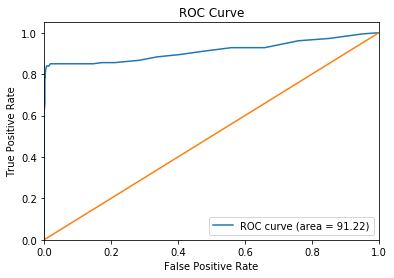

In [34]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(te_Y, best_model.predict_proba(te_X)[:, 1])

# Calculate the AUC
roc_auc = (auc(fpr, tpr)*100)
print ('ROC AUC: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = "lower right")
plt.show()

#### 8. Feature Importance

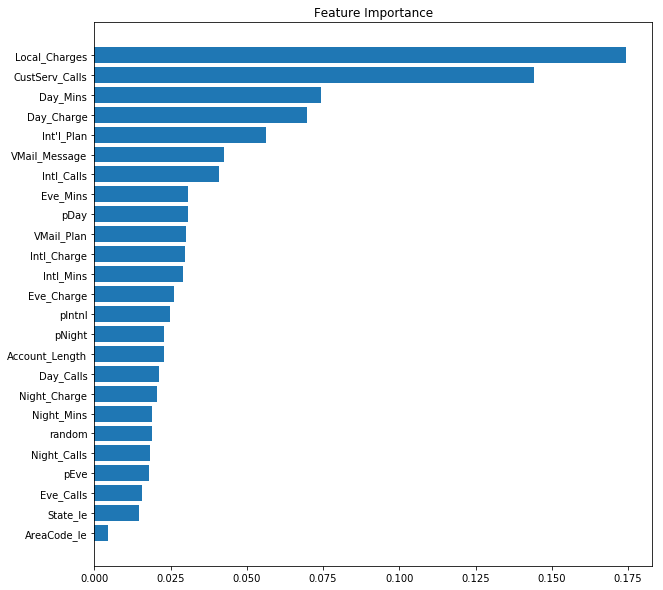

In [35]:
from sklearn import datasets
import numpy as np

#Calculating feature importances
importances = best_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [tr_X.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize = (10, 10))
plt.title("Feature Importance")

predicted = best_model.predict(te_X)

compare = tr_Y

if isinstance(compare, pd.DataFrame):
    compare = compare.to_numpy().reshape(len(predicted), )

# Add horizontal bars
plt.barh(range(tr_X.shape[1]), importances[indices], align = 'center')
plt.yticks(range(tr_X.shape[1]), names)
plt.show()

<div class="alert alert-block alert-info">
<b>Top 5 Important Features: </b> <br>
    1. Local_Charges <br>
    2. CustServ_Calls <br>
    3. Day_Mins <br>
    4. Day_Charge <br>
    5. Int'l_Plan <br>
</div>